In [1]:
import sys, os
import matplotlib
import scipy.io, numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

In [2]:
cd /data/keeling/a/yicenl2/c/git/project/partmc/scenarios

/data/nriemer/c/yicenl2/git/project/partmc/scenarios


# Without H2O

In [3]:
s1 = pd.Series(['no3','so4','nh4','bc','oin','cl','na','ca','co3','oc','soa'])
print(s1)

0     no3
1     so4
2     nh4
3      bc
4     oin
5      cl
6      na
7      ca
8     co3
9      oc
10    soa
dtype: object


In [4]:
directory = 'sce_completed/scenarios'

mass_frac_dist = np.zeros((11,2,100,25,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_00000" in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(11):
                mass_frac_dist[i, 0, sce_index, t_index,:,:] = ncf.variables["diam_" + s1[i] 
                                                               + "_dist_pr"].data * 1e-6
                mass_frac_dist[i, 1, sce_index, t_index,:,:] = ncf.variables["diam_" + s1[i] 
                                                               + "_dist_avg"].data * 1e-6

      no3_mass_frac  no3_mass_frac_avg
0               0.0                0.0
1               0.0                0.0
2               0.0                0.0
3               0.0                0.0
4               0.0                0.0
...             ...                ...
8995            0.0                0.0
8996            0.0                0.0
8997            0.0                0.0
8998            0.0                0.0
8999            0.0                0.0

[9000 rows x 2 columns]
   tot_no3_mass_frac
0      276688.440289
47.956711025340056
47.956711025340056


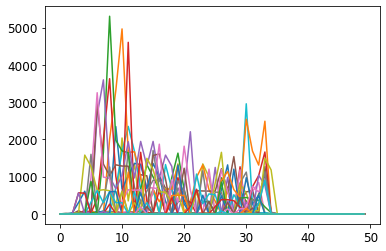

In [5]:
plt.plot(mass_frac_dist[0, 0, 1, 12,:,:])
#for i in range(11):
d = {"no3_mass_frac": mass_frac_dist[0, 0, 1, 12,:,:].ravel(),
     "no3_mass_frac_avg":  mass_frac_dist[0, 1, 1, 12,:,:].ravel()}
df = pd.DataFrame(data=d)
print(df)

d1 = {"tot_no3_mass_frac": df['no3_mass_frac'].sum()}
df1 = pd.DataFrame(data=d1, index=[0])
print(df1)

tot_mass_frac = np.zeros((11,2))
for i in range(11):
    tot_mass_frac[i,0] = mass_frac_dist[i, 0, sce_index, t_index,:,:].sum()
    tot_mass_frac[i,1] = mass_frac_dist[i, 1, sce_index, t_index,:,:].sum()
    
print(tot_mass_frac[i,0])
print(tot_mass_frac[i,1])

In [9]:
directory = 'sce_completed/scenarios/'
bulk_spec_mass = np.zeros((12,100,25))
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_process.nc" in filename):
            sce_ind      =  int(filename[-30:-27])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            bulk_spec_mass[0, sce_ind, :] = ncf.variables["tot_dry_mass_conc"].data*1e9 # µg/m3
            for i in range(11):
                bulk_spec_mass[i+1,sce_ind,:] = ncf.variables["tot_" + s1[i] 
                                                    + "_mass_conc"].data*1e9
                
d1 = {s1[0] + "_mass_frac": bulk_spec_mass[1,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[1] + "_mass_frac": bulk_spec_mass[2,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[2] + "_mass_frac": bulk_spec_mass[3,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[3] + "_mass_frac": bulk_spec_mass[4,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[4] + "_mass_frac": bulk_spec_mass[5,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[5] + "_mass_frac": bulk_spec_mass[6,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[6] + "_mass_frac": bulk_spec_mass[7,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[7] + "_mass_frac": bulk_spec_mass[8,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[8] + "_mass_frac": bulk_spec_mass[9,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[9] + "_mass_frac": bulk_spec_mass[10,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s1[10] + "_mass_frac": bulk_spec_mass[11,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum()}
df1 = pd.DataFrame(data=d1, index=[0])

bulk = df1.sum()
print(bulk)
print(bulk.sum())

# d2 = {s1[0] + "_mass_conc": bulk_spec_mass[1,:,:].ravel().sum(),
#      s1[1] + "_mass_conc": bulk_spec_mass[2,:,:].ravel().sum(),
#      s1[2] + "_mass_conc": bulk_spec_mass[3,:,:].ravel().sum(),
#      s1[3] + "_mass_conc": bulk_spec_mass[4,:,:].ravel().sum(),
#      s1[4] + "_mass_conc": bulk_spec_mass[5,:,:].ravel().sum(),
#      s1[5] + "_mass_conc": bulk_spec_mass[6,:,:].ravel().sum(),
#      s1[6] + "_mass_conc": bulk_spec_mass[7,:,:].ravel().sum(),
#      s1[7] + "_mass_conc": bulk_spec_mass[8,:,:].ravel().sum(),
#      s1[8] + "_mass_conc": bulk_spec_mass[9,:,:].ravel().sum(),
#      s1[9] + "_mass_conc": bulk_spec_mass[10,:,:].ravel().sum(),
#      s1[10] + "_mass_conc": bulk_spec_mass[11,:,:].ravel().sum()}
# df2 = pd.DataFrame(data=d2, index=[0])

# bulk_mass = df2.sum()
# print(bulk_mass)

no3_mass_frac    0.126585
so4_mass_frac    0.049919
nh4_mass_frac    0.028103
bc_mass_frac     0.050413
oin_mass_frac    0.169368
cl_mass_frac     0.266132
na_mass_frac     0.207415
ca_mass_frac     0.000000
co3_mass_frac    0.000000
oc_mass_frac     0.091697
soa_mass_frac    0.009669
dtype: float64
0.9993017903599537


# With H2O

In [7]:
s2 = pd.Series(['no3','so4','h2o','nh4','bc','oin','cl','na','ca','co3','oc','soa'])
print(s2)

0     no3
1     so4
2     h2o
3     nh4
4      bc
5     oin
6      cl
7      na
8      ca
9     co3
10     oc
11    soa
dtype: object


In [8]:
directory = 'sce_completed/scenarios/'
bulk_spec_mass = np.zeros((13,100,25))
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_process.nc" in filename):
            sce_ind      =  int(filename[-30:-27])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            bulk_spec_mass[0, sce_ind, :] = ncf.variables["tot_mass_conc"].data*1e9
            for i in range(12):
                bulk_spec_mass[i+1,sce_ind,:] = ncf.variables["tot_" + s2[i] 
                                                    + "_mass_conc"].data*1e9
                
d = {s2[0] + "_mass_frac": bulk_spec_mass[1,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[1] + "_mass_frac": bulk_spec_mass[2,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[2] + "_mass_frac": bulk_spec_mass[3,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[3] + "_mass_frac": bulk_spec_mass[4,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[4] + "_mass_frac": bulk_spec_mass[5,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[5] + "_mass_frac": bulk_spec_mass[6,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[6] + "_mass_frac": bulk_spec_mass[7,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[7] + "_mass_frac": bulk_spec_mass[8,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[8] + "_mass_frac": bulk_spec_mass[9,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[9] + "_mass_frac": bulk_spec_mass[10,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[10] + "_mass_frac": bulk_spec_mass[11,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum(),
     s2[11] + "_mass_frac": bulk_spec_mass[12,:,:].ravel().sum()/bulk_spec_mass[0,:,:].ravel().sum()}
df = pd.DataFrame(data=d, index=[0])

bulk = df.sum()
print(bulk)
print(bulk.sum())

no3_mass_frac    0.018442
so4_mass_frac    0.007273
h2o_mass_frac    0.854310
nh4_mass_frac    0.004094
bc_mass_frac     0.007345
oin_mass_frac    0.024675
cl_mass_frac     0.038773
na_mass_frac     0.030218
ca_mass_frac     0.000000
co3_mass_frac    0.000000
oc_mass_frac     0.013359
soa_mass_frac    0.001409
dtype: float64
0.9998982779563039
